In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("spotify.csv")

In [6]:
df.sample().T

,22792
track_id,1f9lD5VdRIGdSihiIwOFSx
track_name,Malvadão 2
track_artist,Xamã
track_popularity,63
track_album_id,1E51Sg2mecSmWIXkuqY2mp
track_album_name,Malvadão 2
track_album_release_date,2019-09-13
playlist_name,Brisa Pop
playlist_id,37i9dQZF1DX2vsux22VuNL
playlist_genre,r&b


In [7]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [8]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [22]:
X = df[['danceability', 'instrumentalness', 'tempo']]

In [23]:
from sklearn.cluster import KMeans

tata = KMeans(n_clusters=10)
tata.fit(X)

KMeans(n_clusters=10)

In [24]:
tata.labels_

array([0, 2, 0, ..., 5, 5, 5])

In [25]:
df['cluster'] = tata.labels_

<Axes: xlabel='danceability', ylabel='track_popularity'>

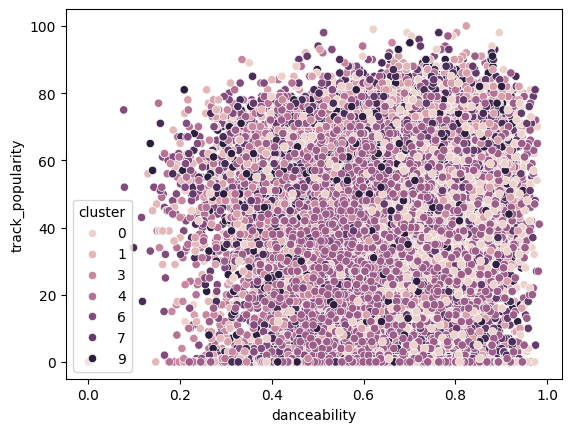

In [26]:
import seaborn as sns

sns.scatterplot(df, x='danceability', y='track_popularity', hue="cluster")

In [32]:
df[df['cluster']==8].sample(7)[['track_name', 'track_artist','danceability','tempo']]

,track_name,track_artist,danceability,tempo
19023,Reggaetón en lo Oscuro,Wisin & Yandel,0.747,91.970
19340,Mayor Que Yo 3,Luny Tunes,0.715,91.975
5103,Enjoy the Ride,Illa J,0.697,91.038
25458,Old Age,Masego,0.756,87.893
19576,Dile,Don Omar,0.828,94.030
8540,If I Can't,50 Cent,0.877,93.952
7188,Life Story (feat. Al-D & Bam),Z-Ro,0.716,88.992


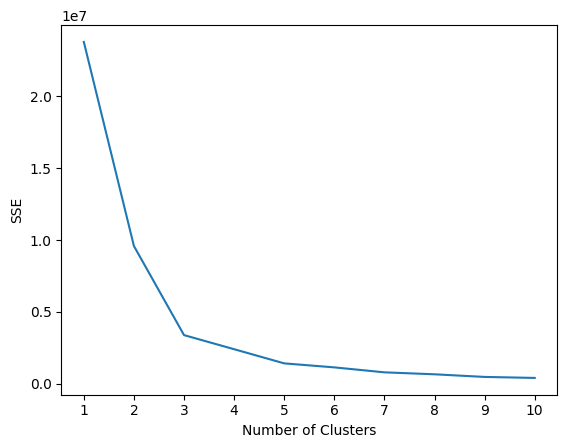

In [33]:
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Visualize the results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [34]:
!pip install flask

  Using cached flask-3.0.3-py3-none-any.whl (101 kB)
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
  Using cached blinker-1.8.2-py3-none-any.whl (9.5 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
  Using cached werkzeug-3.0.3-py3-none-any.whl (227 kB)
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Uninstalling click-8.0.4:
      Successfully uninstalled click-8.0.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.12.3 requires markdown>=2.6.8, which is not installed.
